In [276]:
from statsbombpy import sb
import pandas as pd
pd.set_option('display.max_columns', 100)

import warnings
warnings.filterwarnings('ignore')

In [13]:
matches = sb.matches(competition_id=55, season_id=282)

match_id = 	3938643
team_team = 'France'
away_team = 'Poland'

C:\Users\Aleks\AppData\Roaming\Python\Python310\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


In [11]:
events = sb.events(match_id=match_id)

C:\Users\Aleks\AppData\Roaming\Python\Python310\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


In [77]:
def get_basic_data(team, events):
    shots = events[(events['type'] == 'Shot') & (events['team'] == team)]
    xg = round(shots['shot_statsbomb_xg'].sum(), 2)
    shot_amt = (len(shots))
    SoT = len(shots[~(shots['shot_outcome'].isin(['Blocked', 'Off T', 'Post', 'Wayward']))])
    xg_per_shot = round(xg / shot_amt, 2)
    return [xg, str(shot_amt), str(SoT), xg_per_shot]

table_data = pd.DataFrame({
    home_team: get_basic_data(home_team, events),
    'Stat': ['xG', 'Shots', 'Shots on Target', 'xG per Shot'],
    away_team: get_basic_data(away_team, events)
})

table_data

,France,Stat,Poland
0,1.89,xG,1.18
1,19,Shots,10
2,8,Shots on Target,3
3,0.1,xG per Shot,0.12


In [507]:
country_colors

{'Poland': '#ffffff',
 'Denmark': '#C60C30',
 'Portugal': '#006400',
 'Germany': '#000000',
 'France': '#0055A4',
 'Netherlands': '#E77E02',
 'Belgium': '#FFD700',
 'Spain': '#C60C30',
 'Croatia': '#FF0000',
 'England': '#002366',
 'Serbia': '#DC143C',
 'Switzerland': '#FF0000',
 'Scotland': '#006cb7',
 'Hungary': '#008d55',
 'Albania': '#ed1b24',
 'Italy': '#009247',
 'Slovenia': '#005aab',
 'Austria': '#ed1b24',
 'Slovakia': '#005aab',
 'Romania': '#ffde00',
 'Ukraine': '#005aab',
 'Turkey': '#ed1b24',
 'Georgia': '#fffffc',
 'Czech Republic': '#005aab'}

In [508]:
from auxiliary import country_colors, annotation_fix_dict
country_colors['Poland'] = "#de1a41"

In [102]:
n_rows=4
from mplsoccer import Pitch, VerticalPitch
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib as mpl
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap

In [109]:
team='Poland'

In [113]:
events = sb.events(match_id=match_id)
events = events[events['type']=='Shot']
events = events.query(f' type == "Shot" and team == "{team}"')
events

,50_50,ball_receipt_outcome,ball_recovery_recovery_failure,block_deflection,carry_end_location,clearance_aerial_won,clearance_body_part,clearance_head,clearance_left_foot,clearance_right_foot,counterpress,dribble_nutmeg,dribble_outcome,duel_outcome,duel_type,duration,foul_committed_advantage,foul_committed_card,foul_committed_offensive,foul_committed_penalty,foul_committed_type,foul_won_advantage,foul_won_defensive,foul_won_penalty,goalkeeper_body_part,goalkeeper_end_location,goalkeeper_outcome,goalkeeper_position,goalkeeper_technique,goalkeeper_type,id,index,injury_stoppage_in_chain,interception_outcome,location,match_id,minute,off_camera,out,pass_aerial_won,pass_angle,pass_assisted_shot_id,pass_body_part,pass_cross,pass_cut_back,pass_end_location,pass_height,pass_inswinging,pass_length,pass_no_touch,pass_outcome,pass_outswinging,pass_recipient,pass_recipient_id,pass_shot_assist,pass_switch,pass_technique,pass_through_ball,pass_type,period,play_pattern,player,player_id,position,possession,possession_team,possession_team_id,related_events,second,shot_aerial_won,shot_body_part,shot_deflected,shot_end_location,shot_first_time,shot_freeze_frame,shot_key_pass_id,shot_one_on_one,shot_outcome,shot_statsbomb_xg,shot_technique,shot_type,substitution_outcome,substitution_outcome_id,substitution_replacement,substitution_replacement_id,tactics,team,team_id,timestamp,type,under_pressure
3653,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.942596,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,66a628bd-d096-4cdf-814e-0eab1b93f27e,296,NaN,NaN,"[93.9, 38.9]",3938643,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,From Goal Kick,Piotr Zieliński,5660.0,Left Center Midfield,10,Poland,789,[0ee26231-388c-4382-bd2c-c820b721bb8c],45,NaN,Right Foot,NaN,"[117.1, 42.1, 0.9]",True,"[{'location': [87.1, 29.2], 'player': {'id': 5...",NaN,NaN,Saved,0.021823,Half Volley,Open Play,NaN,NaN,NaN,NaN,NaN,Poland,789,00:05:45.011,Shot,NaN
3655,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.096016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,e5ef3b47-45ff-41cd-bbb4-5f91f22572d1,694,NaN,NaN,"[104.2, 25.1]",3938643,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,From Goal Kick,Sebastian Szymański,4664.0,Right Center Midfield,26,Poland,789,"[58c1395f-d5fc-4708-8d9b-4901d7d95c2c, 860d2bd...",32,NaN,Left Foot,NaN,"[104.7, 25.6]",True,"[{'location': [98.0, 36.8], 'player': {'id': 1...",c73288e8-f580-4302-b4c1-4c47b06a0b72,NaN,Blocked,0.054202,Normal,Open Play,NaN,NaN,NaN,NaN,NaN,Poland,789,00:13:32.283,Shot,NaN
3656,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.645504,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23ebd3d3-4029-4462-81ed-5a5b330f1075,700,NaN,NaN,"[106.1, 38.3]",3938643,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,From Corner,Kacper Urbanski,33680.0,Right Center Forward,27,Poland,789,[28205bdc-5886-4127-94db-e0da24cc2c6f],8,NaN,Left Foot,NaN,"[118.9, 38.2, 1.6]",True,"[{'location': [117.7, 30.9], 'player': {'id': ...",NaN,NaN,Saved,0.069556,Half Volley,Open Play,NaN,NaN,NaN,NaN,NaN,Poland,789,00:14:08.552,Shot,NaN
3657,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.980638,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,aab9d5ba-773a-4bde-9884-b5ab2292a6c8,831,NaN,NaN,"[89.7, 27.9]",3938643,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,From Throw In,Jakub Moder,29480.0,Center Defensive Midfield,31,Poland,789,"[067ece48-0454-40aa-9bdd-8275ebfec284, 6be1ff3...",50,NaN,Right Foot,NaN,"[120.0, 47.6, 6.3]",NaN,"[{'location': [106.0, 38.5], 'player': {'id': ...",8ae16987-bb51-49ba-b678-c27f08f9b615,NaN,Off T,0.016467,Normal,Open Play,NaN,NaN,NaN,NaN,NaN,Poland,789,00:16:50.084,Shot,True
3659,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.108152,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [557]:
def lighten_hex_color(hex_color, percentage):

    hex_color = hex_color.lstrip('#')
    r, g, b = int(hex_color[0:2], 16), int(hex_color[2:4], 16), int(hex_color[4:6], 16)
    r, g, b = int(r + (255 - r) * percentage), int(g + (255 - g) * percentage), int(b + (255 - b) * percentage)
    r, g, b = min(255, int(r)), min(255, int(g)), min(255, int(b))
    
    return "#{:02x}{:02x}{:02x}".format(r, g, b)


def darken_hex_color(hex_color, percentage):
    hex_color = hex_color.lstrip('#')
    r, g, b = int(hex_color[0:2], 16), int(hex_color[2:4], 16), int(hex_color[4:6], 16)
    r, g, b = int(r * (1 - percentage)), int(g * (1 - percentage)), int(b * (1 - percentage))
    
    return "#{:02x}{:02x}{:02x}".format(r, g, b)

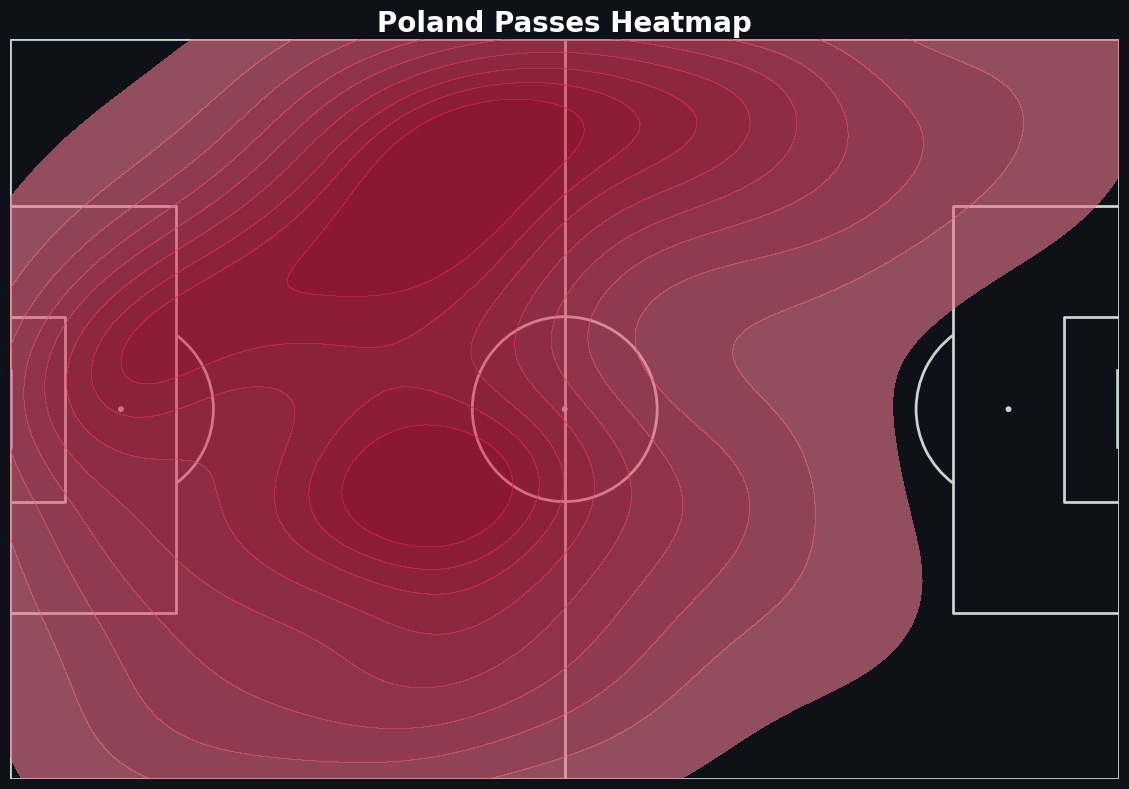

In [278]:
def passes_heatmap(match_id, team):
    passes = sb.events(match_id=match_id, split=True, flatten_attrs=False)["passes"]
    passes = passes.query(f'team == "{team}"')

    fig ,ax = plt.subplots(figsize=(13, 8),constrained_layout=False, tight_layout=True)
    fig.set_facecolor('#0e1117')
    ax.patch.set_facecolor('#0e1117')
    pitch = Pitch(pitch_type='statsbomb', pitch_color='#0e1117', line_color='#c7d5cc')
    pitch.draw(ax=ax)

    passes['x'], passes['y'] = zip(*passes['location'])


    sns.kdeplot(
            x=passes["x"],
            y=passes["y"],
            fill = True,
            shade_lowest=False,
            alpha=.6,
            n_levels=10,
            cmap = LinearSegmentedColormap.from_list('', [lighten_hex_color('#de1a41', 0.45), '#de1a41'], N=100)
        )
    plt.xlim(0,120)
    plt.ylim(80,0)

    ax.set_title(f'{team} Passes Heatmap', color='white', size=20, fontweight='bold')


passes_heatmap(match_id, team)

# **xT**

In [282]:
import numpy as np

In [342]:
def get_players_xT(match_id):
    xT = pd.read_csv("https://raw.githubusercontent.com/AKapich/WorldCup_App/main/app/xT_Grid.csv", header=None)
    xT = np.array(xT)
    xT_rows, xT_cols = xT.shape 
    events = sb.events(match_id=match_id)

    players = events[['player', 'team']].drop_duplicates().dropna()

    def get_xT(type):
        df = events[events['type']==type]
        df['start_x'], df['start_y'] = zip(*df['location'])
        df['end_x'], df['end_y'] = zip(*df[f'{type.lower()}_end_location'])

        df[f'start_x_bin'] = pd.cut(df['start_x'], bins=xT_cols, labels=False)
        df[f'start_y_bin'] = pd.cut(df['start_y'], bins=xT_rows, labels=False)
        df[f'end_x_bin'] = pd.cut(df['end_x'], bins=xT_cols, labels=False)
        df[f'end_y_bin'] = pd.cut(df['end_x'], bins=xT_rows, labels=False)
        df['start_zone_value'] = df[[f'start_x_bin', f'start_y_bin']].apply(lambda z: xT[z[1]][z[0]], axis=1)
        df['end_zone_value'] = df[[f'end_x_bin', f'end_y_bin']].apply(lambda z: xT[z[1]][z[0]], axis=1)
        df[f'{type.lower()}_xT'] = df['start_zone_value']-df['end_zone_value']

        return df[['player', f'{type.lower()}_xT']]

    for type in ['Pass', 'Carry']:
        xT_df = get_xT(type)
        xT_df = xT_df.groupby('player').sum()
        players = pd.merge(players, xT_df, on='player', how='left')

    players = players.fillna(0)
    players['total_xT'] = players['pass_xT'] + players['carry_xT']
    players = players.sort_values('total_xT', ascending=False)

    return players


In [344]:
xtdf = get_players_xT(match_id)

Text(0.5, 1.0, 'Players xT')

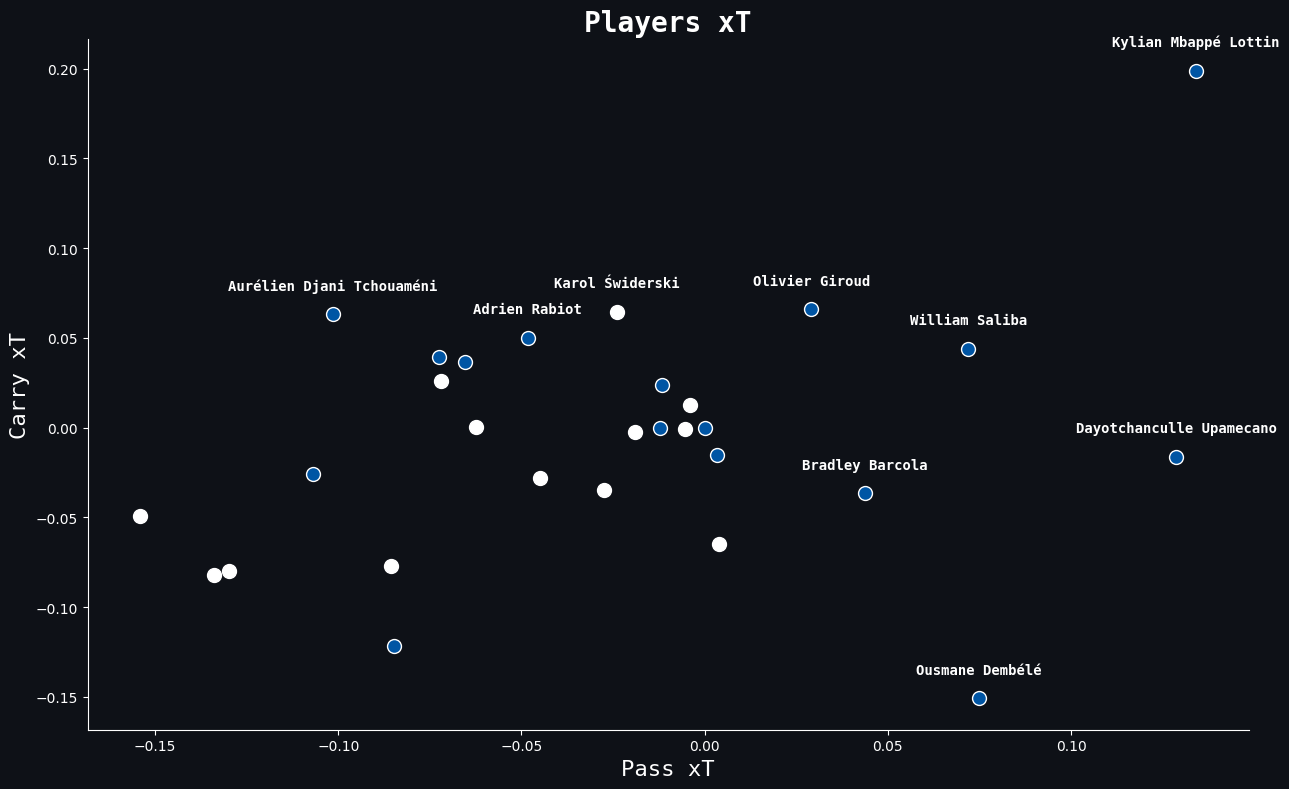

In [385]:
fig, ax = plt.subplots(figsize=(13, 8),constrained_layout=False, tight_layout=True)
fig.patch.set_facecolor('#0e1117')
ax.set_facecolor('#0e1117')
for _, row in xtdf.iterrows():
    ax.scatter(
        x=row['pass_xT'],
        y=row['carry_xT'],
        s=100,
        color=country_colors[row['team']],
        edgecolor='white',
        linewidth=1
    )
    top_xT = xtdf.sort_values('total_xT', ascending=False).head(5)['player'].values
    top_pass_xT = xtdf.sort_values('pass_xT', ascending=False).head(5)['player'].values
    top_carry_xT = xtdf.sort_values('carry_xT', ascending=False).head(5)['player'].values

    if row['player'] in top_pass_xT or row['player'] in top_carry_xT or row['player'] in top_xT:
        ax.text(
            row['pass_xT'],
            row['carry_xT']+0.08*max(xtdf['carry_xT']),
            row['player'],
            fontname='Monospace',
            color='white',
            ha='center',
            va='center',
            fontweight='bold'
        )
    
ax.set_xlabel('Pass xT', fontname='Monospace',color='white',fontsize=16)
ax.set_ylabel('Carry xT', fontname='Monospace',color='white',fontsize=16)


for x in ['top','bottom','left','right']:
        if x in ['top', 'right']:
                ax.spines[x].set_visible(False)
        else:
                ax.spines[x].set_color('white')

ax.set_title('Players xT', fontname='Monospace',color='white',fontsize=20, fontweight='bold')

xT heatmap

In [505]:
country_colors

{'Poland': '#ffffff',
 'Denmark': '#C60C30',
 'Portugal': '#006400',
 'Germany': '#000000',
 'France': '#0055A4',
 'Netherlands': '#E77E02',
 'Belgium': '#FFD700',
 'Spain': '#C60C30',
 'Croatia': '#FF0000',
 'England': '#002366',
 'Serbia': '#DC143C',
 'Switzerland': '#FF0000',
 'Scotland': '#006cb7',
 'Hungary': '#008d55',
 'Albania': '#ed1b24',
 'Italy': '#009247',
 'Slovenia': '#005aab',
 'Austria': '#ed1b24',
 'Slovakia': '#005aab',
 'Romania': '#ffde00',
 'Ukraine': '#005aab',
 'Turkey': '#ed1b24',
 'Georgia': '#fffffc',
 'Czech Republic': '#005aab'}

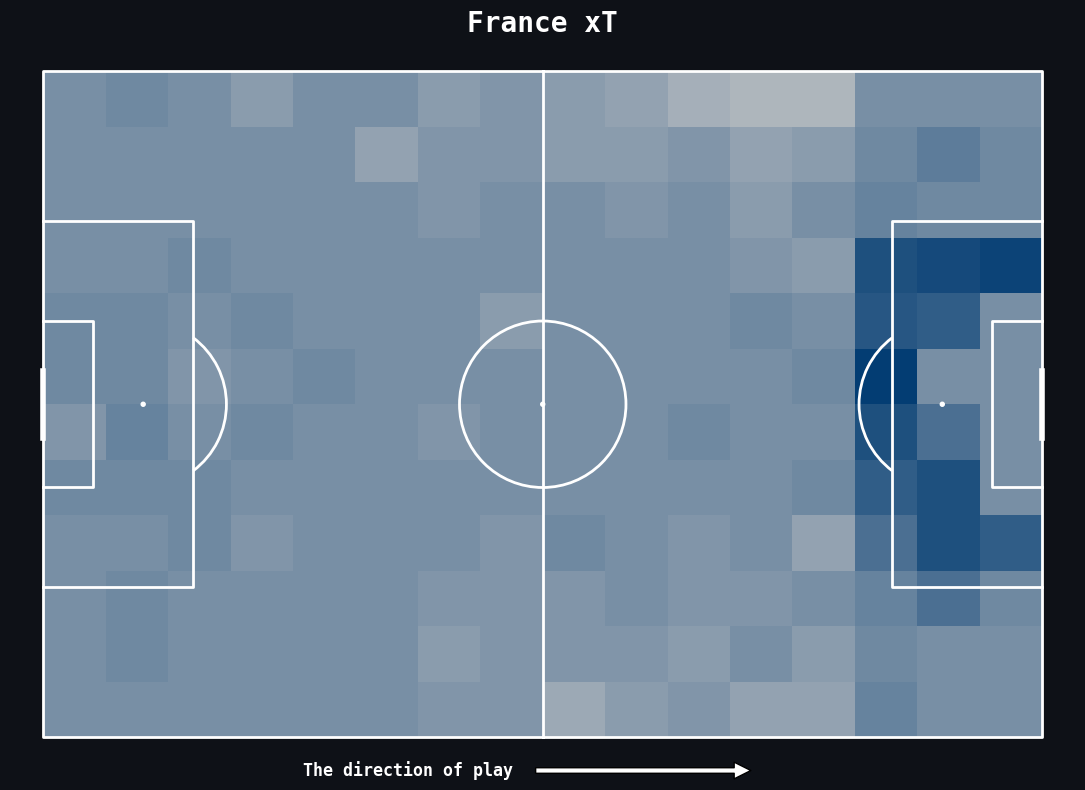

In [583]:
def xT_heatmap(match_id, team, inverse=False):
    xT = pd.read_csv("https://raw.githubusercontent.com/AKapich/WorldCup_App/main/app/xT_Grid.csv", header=None)
    xT = np.array(xT)
    xT_rows, xT_cols = xT.shape 
    events = sb.events(match_id=match_id)
    events = events[events['team']==team]

    def get_xT(type):
        df = events[events['type']==type]
        df['start_x'], df['start_y'] = zip(*df['location'])
        df['end_x'], df['end_y'] = zip(*df[f'{type.lower()}_end_location'])

        df[f'start_x_bin'] = pd.cut(df['start_x'], bins=xT_cols, labels=False)
        df[f'start_y_bin'] = pd.cut(df['start_y'], bins=xT_rows, labels=False)
        df[f'end_x_bin'] = pd.cut(df['end_x'], bins=xT_cols, labels=False)
        df[f'end_y_bin'] = pd.cut(df['end_x'], bins=xT_rows, labels=False)
        df['start_zone_value'] = df[[f'start_x_bin', f'start_y_bin']].apply(lambda z: xT[z[1]][z[0]], axis=1)
        df['end_zone_value'] = df[[f'end_x_bin', f'end_y_bin']].apply(lambda z: xT[z[1]][z[0]], axis=1)
        df['xT'] = df['start_zone_value']-df['end_zone_value']

        return df[['xT', 'start_x', 'start_y', 'end_x', 'end_y', 'type']]

    xtdf = pd.concat([get_xT('Pass'), get_xT('Carry')], axis=0)
    
    if inverse:
        xtdf['start_x'] = 120 - xtdf['start_x']
        xtdf['end_x'] = 120 - xtdf['end_x']
        xtdf['start_y'] = 80 - xtdf['start_y']
        xtdf['end_y'] = 80 - xtdf['end_y']


    fig, ax= plt.subplots(figsize=(13, 8),constrained_layout=False, tight_layout=True)
    fig.patch.set_facecolor('#0e1117')
    ax.set_facecolor('#0e1117')

    pitch = Pitch(pitch_type='statsbomb', pitch_color='#0e1117', line_color='white', line_zorder=2)
    pitch.draw(ax=ax)


    bin_statistic = pitch.bin_statistic(xtdf.start_x, xtdf.start_y, values=xtdf.xT, statistic='sum', bins=(16, 12), normalize=False)
    pitch.heatmap(bin_statistic, edgecolor='None', ax=ax, alpha=0.75,
            cmap=LinearSegmentedColormap.from_list('', [lighten_hex_color(country_colors[team], 0.9),
                                                        darken_hex_color(country_colors[team], 0.1)], N=20))


    if not inverse:
        pitch.annotate(text='The direction of play  ', xytext=(45, 84), xy=(85, 84), ha='center', va='center', ax=ax,
                    arrowprops=dict(facecolor='white'), fontsize=12, color='white', fontweight="bold", family="monospace")
    else:
        pitch.annotate(text='  The direction of play', xytext=(75, 84), xy=(35, 84), ha='center', va='center', ax=ax,
                    arrowprops=dict(facecolor='white'), fontsize=12, color='white', fontweight="bold", family="monospace")
        
    ax.set_title(f'{team} xT', color='white', fontsize=20, fontweight='bold', fontfamily='Monospace', pad=-5)

xT_heatmap(match_id, 'France', inverse=False)

In [573]:
country_colors = {
    "Poland": "#de1a41",
    "Denmark": "#cf1f25", #######
    "Portugal": "#006400",
    "Germany": "#b864c1", #########
    "France": "#0055A4",
    "Netherlands": "#E77E02",
    "Belgium": "#FFD700",
    "Spain": "#fd112a", ###########
    "Croatia": "#0766af", ########
    "England": "#002366",
    "Serbia": "#711e28", ########
    "Switzerland": "#FF0000",
    "Scotland": '#006cb7',
    'Hungary': '#008d55',
    'Albania': '#ed1b24',
    'Italy': '#009247',
    'Slovenia': '#005aab',
    'Austria': '#ed1b24',
    'Slovakia': '#005aab',
    'Romania': '#ffde00',
    'Ukraine': '#005aab',
    'Turkey': '#ed1b24',
    'Georgia': '#fffffc',
    'Czech Republic': '#005aab'
}

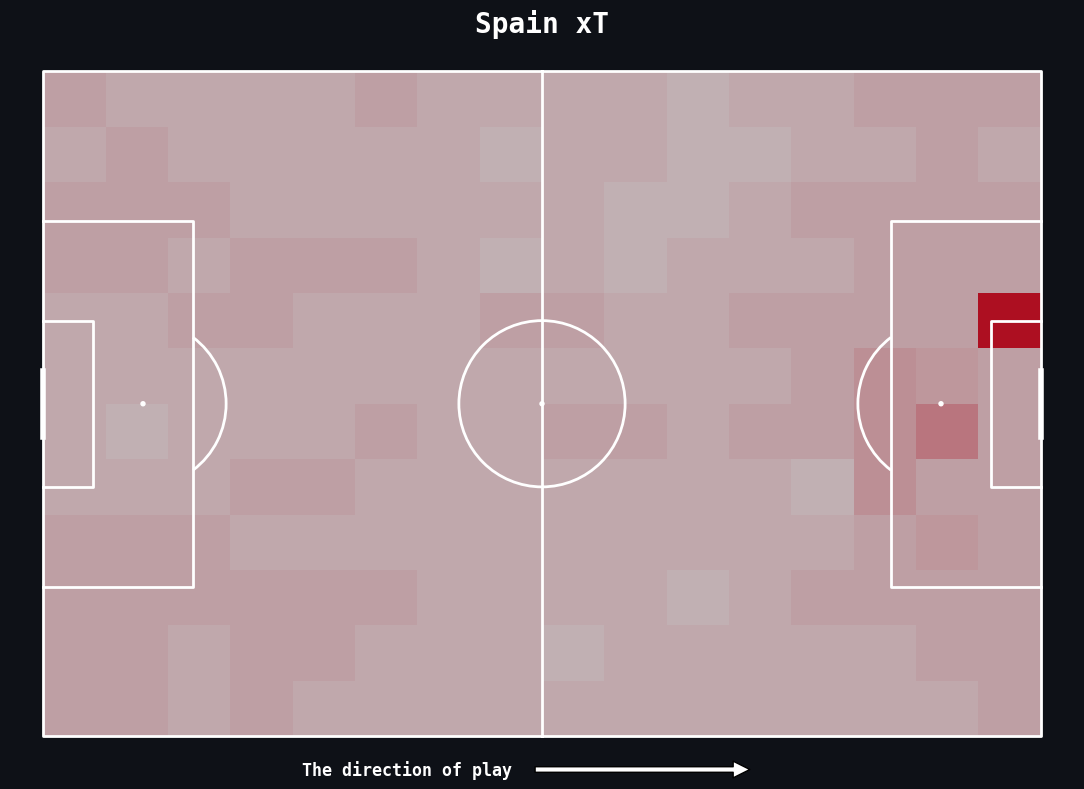

In [584]:
xT_heatmap(3942226, 'Spain')

In [480]:
# by passes
xT = pd.read_csv("https://raw.githubusercontent.com/AKapich/WorldCup_App/main/app/xT_Grid.csv", header=None)
xT = np.array(xT)
xT_rows, xT_cols = xT.shape 
events = sb.events(match_id=match_id)


df = events[events['type'].isin(['Pass', 'Carry'])]
df['start_x'], df['start_y'] = zip(*df['location'])
df['end_x'], df['end_y'] = None, None

for _, row in df.iterrows():
    if row['type'] == 'Pass':
        row['end_x'], row['end_y'] = row['pass_end_location'][0], row['pass_end_location'][1]
    else:
        row['end_x'], row['end_y'] = row['carry_end_location'][0], row['carry_end_location'][1]

df[f'start_x_bin'] = pd.cut(df['start_x'], bins=xT_cols, labels=False)
df[f'start_y_bin'] = pd.cut(df['start_y'], bins=xT_rows, labels=False)
df[f'end_x_bin'] = pd.cut(df['end_x'], bins=xT_cols, labels=False)
df[f'end_y_bin'] = pd.cut(df['end_x'], bins=xT_rows, labels=False)

df['start_zone_value'] = df[[f'start_x_bin', f'start_y_bin']].apply(lambda z: xT[z[1]][z[0]], axis=1)
df['end_zone_value'] = df[[f'end_x_bin', f'end_y_bin']].apply(lambda z: xT[z[1]][z[0]], axis=1)

df['xT'] = df['start_zone_value']-df['end_zone_value']

df.columns

ValueError: Bin edges must be unique: Index([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], dtype='float64').
You can drop duplicate edges by setting the 'duplicates' kwarg

Text(0.5, 1.0, 'France xT')

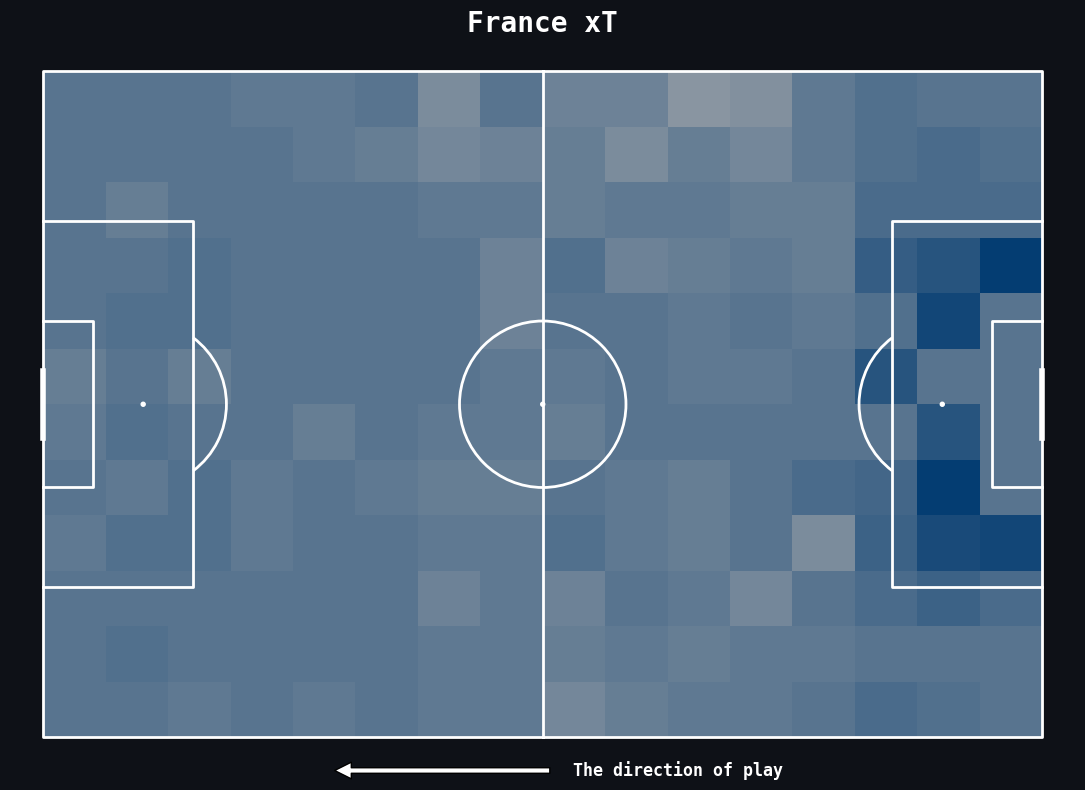

In [454]:
# events = sb.events(match_id=match_id, split=True, flatten_attrs=False)
# press = events['pressures'].query(f"team=='{team}'")
# press_x, press_y = zip(*press['location'])
# press_df = pd.DataFrame({'x': press_x, 'y': press_y})

fig, ax= plt.subplots(figsize=(13, 8),constrained_layout=False, tight_layout=True)
fig.patch.set_facecolor('#0e1117')
ax.set_facecolor('#0e1117')

pitch = Pitch(pitch_type='statsbomb', pitch_color='#0e1117', line_color='white', line_zorder=2)
pitch.draw(ax=ax)


bin_statistic = pitch.bin_statistic(df.start_x, df.start_y, values=df.pass_xT, statistic='sum', bins=(16, 12), normalize=False)
pitch.heatmap(bin_statistic, edgecolor='None', ax=ax, alpha=0.65,
        cmap=LinearSegmentedColormap.from_list('', [lighten_hex_color(country_colors[team], 0.8), country_colors[team]], N=20))

# pitch.label_heatmap(bin_statistic, color='#323b49', fontsize=12, ax=ax, ha='center', va='center',
#                         fontweight='bold', family='monospace')

pitch.annotate(text='  The direction of play', xytext=(75, 84), xy=(35, 84), ha='center', va='center', ax=ax,
            arrowprops=dict(facecolor='white'), fontsize=12, color='white', fontweight="bold", family="monospace")
    
ax.set_title(f'{team} xT', color='white', fontsize=20, fontweight='bold', fontfamily='Monospace', pad=-5)

In [386]:
xT = pd.read_csv("https://raw.githubusercontent.com/AKapich/WorldCup_App/main/app/xT_Grid.csv", header=None)
xT = np.array(xT)
xT_rows, xT_cols = xT.shape 
events = sb.events(match_id=match_id)

players = events[['player', 'team']].drop_duplicates().dropna()

df = events[events['type'].isin(['Pass', 'Carry'])]
df['start_x'], df['start_y'] = zip(*df['location'])


for type in ['Pass', 'Carry']:
    df['end_x'], df['end_y'] = zip(*df[f'{type.lower()}_end_location'])

df[f'start_x_bin'] = pd.cut(df['start_x'], bins=xT_cols, labels=False)
df[f'start_y_bin'] = pd.cut(df['start_y'], bins=xT_rows, labels=False)
df[f'end_x_bin'] = pd.cut(df['end_x'], bins=xT_cols, labels=False)
df[f'end_y_bin'] = pd.cut(df['end_x'], bins=xT_rows, labels=False)
df['start_zone_value'] = df[[f'start_x_bin', f'start_y_bin']].apply(lambda z: xT[z[1]][z[0]], axis=1)
df['end_zone_value'] = df[[f'end_x_bin', f'end_y_bin']].apply(lambda z: xT[z[1]][z[0]], axis=1)

for type in ['Pass', 'Carry']:
    df[f'{type.lower()}_xT'] = df['start_zone_value']-df['end_zone_value']

df.columns

TypeError: 'float' object is not iterable

# Momentum